In [4]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_excel('Project1Data_Adj.xlsx')

# Supply Function
X_s = df[['cprice','bprice','wprice','q2','q3','q4']]
y_s = df['qu']

X_s = sm.add_constant(X_s)

model_s = sm.OLS(y_s,X_s)

result_s = model_s.fit()

print(result_s.summary())


                            OLS Regression Results                            
Dep. Variable:                     qu   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     4.615
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           0.000470
Time:                        11:35:15   Log-Likelihood:                 106.76
No. Observations:                  84   AIC:                            -199.5
Df Residuals:                      77   BIC:                            -182.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5082      0.153      3.326      0.0

In [5]:
# Correlation between endogenous variable and potential instruments
print(df[['cprice', 'tprice', 'incom']].corr())


          cprice    tprice     incom
cprice  1.000000  0.836910  0.690952
tprice  0.836910  1.000000  0.853276
incom   0.690952  0.853276  1.000000


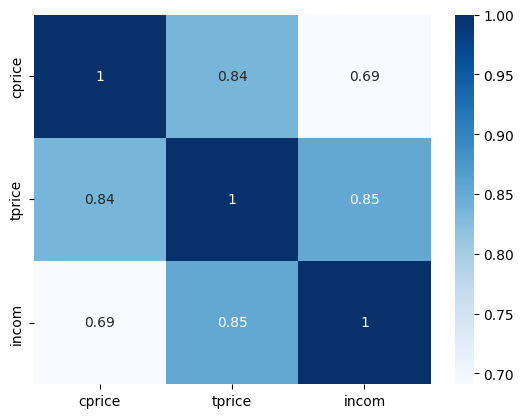

In [7]:
import seaborn as sns

selected_vars = ['cprice', 'tprice', 'incom']
subset_df = df[selected_vars]

sns.heatmap(subset_df.corr(), cmap='Blues', annot=True)

plt.show()

In [4]:
# Check if tprice and incom can be IV

X_end = df['cprice']
X_ex = df[['bprice', 'wprice', 'q2', 'q3', 'q4']]  # Exogenous variables
Z = df[['tprice','incom']]  # Instrument

# Combine the instrument with the exogenous variables
X_first_stage = sm.add_constant(pd.concat([X_ex, Z], axis=1))

# Run the first-stage regression with the instrument and exogenous variables
first_stage_multiple = sm.OLS(X_end, X_first_stage).fit()

# Print the summary to check the F-statistic for the instrument and the overall model
print(first_stage_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:                 cprice   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     348.0
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           5.16e-55
Time:                        11:25:09   Log-Likelihood:                -50.577
No. Observations:                  84   AIC:                             117.2
Df Residuals:                      76   BIC:                             136.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6075      3.616     -2.934      0.0

In [5]:
# Test the exogeneity
from linearmodels.iv import IV2SLS

iv2sls = IV2SLS(dependent = y_s, 
               endog = X_end,
               exog = sm.add_constant(X_ex),
               instruments = Z).fit()

print(iv2sls.wu_hausman())

Wu-Hausman test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 2.3680
P-value: 0.1280
Distributed: F(1,76)


In [6]:
from linearmodels.iv import IV2SLS
# Define variable
y = df['qu']  # dependent variable
X = df[['bprice','wprice', 'q2', 'q3', 'q4']]  # independent variable => without endogeneity problem
Z = df[['tprice']]  # IV
W = df['cprice']  # independent variable => with endogeneity problem

#Add intercept
X = sm.add_constant(X)

# Model
model = IV2SLS(dependent=y, exog=X, endog=W, instruments=Z).fit()

# check result
print(model.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                     qu   R-squared:                      0.1011
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0311
No. Observations:                  84   F-statistic:                    23.976
Date:                Sun, Sep 22 2024   P-value (F-stat)                0.0005
Time:                        11:27:33   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          0.7197     0.2264     3.1785     0.0015      0.2759      1.1636
bprice        -0.1379     0.0989    -1.3937     0.16